# Assignment 2: Exploring Tree-Based Regression Methods for 2D Linear Data
## DTSC 680: Applied Machine Learning

## Name: 

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regression Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 2D linear data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually (you're likely going to be _way_ off).  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regression Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

You will think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results.  Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results?

Lastly, based on the arguments outlined in your critical analysis you must identify the model that best characterizes this data.  In other words, which of these models is going to generalize better? Consider all factors.

## Preliminaries

Let's import some common packages:

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_predictions(regressor, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = regressor.predict(x1.reshape(-1, 1)) 
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `2DLinear.csv`.  Name the returned DataFrame `data`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).
3. Reshape some data, so that we don't run into trouble later.

In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("2DLinear.csv")
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', -1):
    print(data)

X = data['x']
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

            x          y
0    0.834044  8.798998 
1    1.440649  10.010444
2    0.000229  4.626498 
3    0.604665  4.202632 
4    0.293512  4.940633 
5    0.184677  5.016452 
6    0.372520  5.802398 
7    0.691121  5.477904 
8    0.793535  7.379656 
9    1.077633  6.924730 
10   0.838389  6.881005 
11   1.370439  9.718824 
12   0.408904  4.988536 
13   1.756235  8.927876 
14   0.054775  4.651920 
15   1.340935  9.761878 
16   0.834610  6.572799 
17   1.117380  7.825380 
18   0.280774  4.191967 
19   0.396203  4.409502 
20   1.601489  8.026805 
21   1.936523  10.432132
22   0.626848  6.308107 
23   1.384645  8.227945 
24   1.752778  8.805166 
25   1.789213  9.971794 
26   0.170088  6.895471 
27   0.078110  4.110445 
28   0.339661  4.694789 
29   1.756285  9.579609 
30   0.196694  7.051709 
31   0.842215  6.210522 
32   1.915779  7.932274 
33   1.066331  7.883241 
34   1.383754  8.183295 
35   0.631031  6.089364 
36   1.373002  9.026457 
37   1.669251  6.872919 
38   0.036577  4.926577 


# Plot Data

Simply plot your training data here in order to create the plot below.

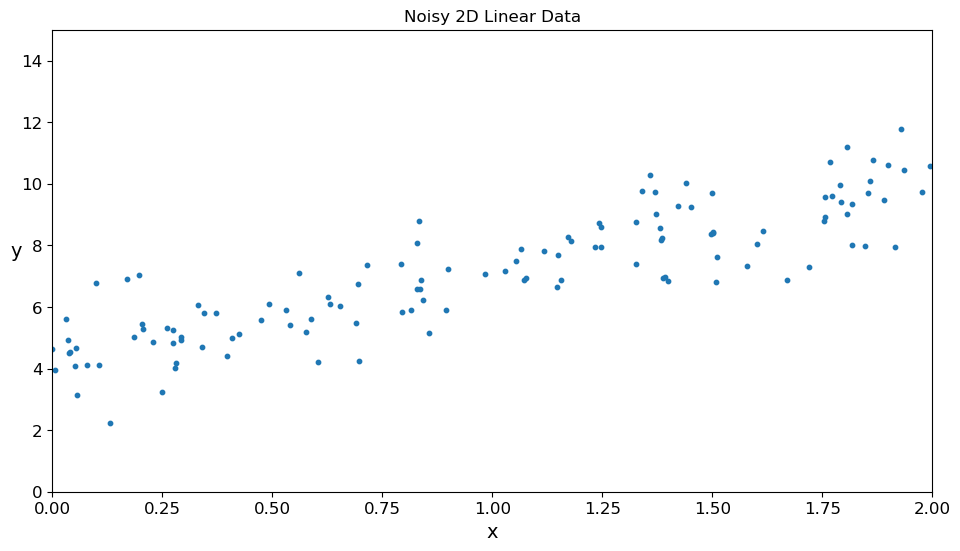

In [3]:
# Originally, I used pandas.plot but noticed in the assignment that the scatterplot had a few features mine didn't. Then, I
# remembered the plot_predictions() function above, so I thought to use it but realized it needed a regressor, so I wrote
# the following to get something like the example figure. First, the y label is horizontal rather than vertically aligned. 
# Second, the x axis was considerably wider than my original figure visually. Third, the points are much smaller. Fourth, the y 
# axis extends to about 15. Also, the pandas  plot was just smaller overall. Lastly, the example plot was saved as 
# Raw2DLinearData. Obviously, I used matplotlib instead of pandas.plot; I just went back and looked at previous assignments from
# previous semesters from both notebook walkthrough's and assignments to get the following, basically. My figure looks pretty 
# similar to the one in the original assignment notebook.

fig = plt.figure(figsize=(12,6))
noisy_scatplot = fig.add_subplot(1, 1, 1)
noisy_scatplot.set_aspect(.07) # This expanded the visual representation of my x axis without changing values.

noisy_scatplot.set_title("Noisy 2D Linear Data")

noisy_scatplot.scatter(data['x'], data['y'], s=10) # Changed the size of the points from 20 to 10.
noisy_scatplot.set_xlabel('x')
noisy_scatplot.set_ylabel('y', rotation=0) # Changed the label "y" from being aligned with the y axis to the x axis

noisy_scatplot.set_ylim(0, 15) # Extends y to 15
noisy_scatplot.set_xlim(0, 2) # Limits x to 2 (without limiting this, the axis extends out farther, which differs from example)

plt.savefig('Raw2DLinearData.png')

# Explore 2D Linear Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordnigly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `learning_rate = <values>`
 - `max_depth = <values>`
 - `n_estimators = <values>`
 - `random_state = 42`

Initial "best values":
 - `learning_rate = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Play around values
learning_rates = [.118, .119, .12, .121, .122]
max_depths = [3, 2, 1]
n_estimators = [128, 129, 130, 131, 132]

# List for results
results = []

# Function to iterate through 'play around' values
for learning_rate in learning_rates:
    for max_depth in max_depths:
        for n_estimator in n_estimators:
            play_gbr_model = GradientBoostingRegressor(learning_rate=learning_rate,
                                                       max_depth=max_depth,
                                                       n_estimators=n_estimator,
                                                       random_state=42)

            play_gbr_model.fit(X_train, y_train)

            # Use trained model on test set to get predictions
            play_gbr_mod_preds = play_gbr_model.predict(X_test)

            # Calculate the mean squared error so I can find the best model by sorting.
            mse = mean_squared_error(y_test, play_gbr_mod_preds)
            
            # Store the results in the results list
            results.append({'learning_rate': learning_rate,
                            'max_depth': max_depth,
                            'n_estimator': n_estimator,
                            'mse': mse,})

            # Print the current parameters, score, and MSE so I can examine how different values change model
            # print(f"Play Parameters: Learning rate={learning_rate}, Max depth={max_depth}, \
            # Estimators={n_estimator}")
            # print(f"Play MSE: {mse}")
            # print()

# Sort the results by MSE (should sort best model to first element by default since MSE will be lowest for best model)
sorted_results = sorted(results, key=lambda x: x['mse'])

# The best "play" parameters are the first element of sorted_results
best_play_parameters = sorted_results[0]

# Print the best parameters, score, and MSE
print(f"Best 'play' parameters: Learning rate={best_play_parameters['learning_rate']}, \
Max depth={best_play_parameters['max_depth']}, Estimators={best_play_parameters['n_estimator']}")
print(f"Best MSE: {best_play_parameters['mse']}")


# Values "played around with":

# learning_rate = <1, .75, .50, .25, .1, .12, .11, .10, .09, .08, .13, .14, .15, .16, .118, .119, .12, .121, .122>
# max_depth = <12, 8, 5, 4, 3 , 2, 1>
# n_estimators = <500, 400, 300, 200, 100, 250, 225, 175, 150, 170, 160, 140, 130, 128, 129, 131, 132>
# random_state = 42


# Initial "best values":

# learning_rate = <.12>
# max_depth = <3>
# n_estimators = <131>
# random_state = 42

Best 'play' parameters: Learning rate=0.12,       Max depth=3, Estimators=131
Best score: 0.7242877863091606
Best MSE: 1.2434049312669424


In [5]:
# Now that I have best parameters, train model.
gbr_model = GradientBoostingRegressor(learning_rate=.12, max_depth=3, n_estimators=131, random_state=42)

gbr_model.fit(X_train, y_train)

# Use trained model on test set to get predictions
gbr_mod_preds = gbr_model.predict(X_test)

### Plot Model Predictions for Training Set

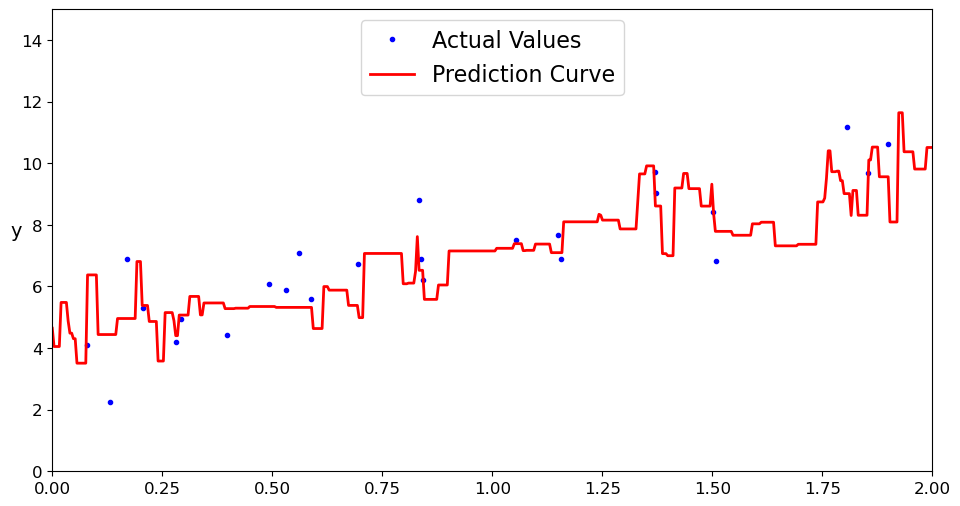

In [6]:
fig = plt.figure(figsize=(12,6))
gbr_model_plot = fig.add_subplot(1, 1, 1)

# Use the plot_predictions function to plot the predictions of the model
plot_predictions(gbr_model, X_test, y_test, axes=[0, 2, 0, 15], label="Prediction Curve", style="r-", 
                 data_style="b.", data_label="Actual Values")

gbr_model_plot.set_aspect(.07)
gbr_model_plot.set_ylabel('y', rotation=0)

fig.savefig('gbr_model_prediction_curve.png')

# Explore 2D Linear Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `min_samples_split = <values>`
 - `max_depth = <values>`
 - `n_estimators = <values>`
 - `random_state = 42`

Initial "best values":
 - `min_samples_split = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Play around values
min_samples_splits = [6, 5, 4]
max_depths = [12, 11, 10, 9, 8]
n_estimators = [55, 54, 53, 52, 51, 50, 49, 48, 47, 46]

# List for results
results = []

# Function to iterate through 'play around' values
for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        for n_estimator in n_estimators:
            play_rfr_model = RandomForestRegressor(min_samples_split=min_samples_split,
                                                  max_depth=max_depth,
                                                  n_estimators=n_estimator,
                                                  random_state=42)
            
            play_rfr_model.fit(X_train, y_train)

            # Use trained model on test set to get predictions
            play_rfr_mod_preds = play_rfr_model.predict(X_test)

            # Calculate the mean squared error so I can find the best model by sorting.
            mse = mean_squared_error(y_test, play_rfr_mod_preds)
            
            # Store the results in the results list so I can print them
            results.append({'min_samples_split': min_samples_split,
                      'max_depth': max_depth,
                      'n_estimator': n_estimator,
                      'mse': mse})
            
            # Print the current parameters, score, and MSE so I can examine how different values change model
            # print(f"Play Parameters: Min Samples Split={min_samples_split}, Max depth={max_depth}, \
            # Estimators={n_estimator}")
            # print(f"Play MSE: {mse}")
            # print()
            
# Sort the results by MSE (should sort best model to first element by default because lowest MSE is best model)
sorted_results = sorted(results, key=lambda x: x['mse'])
            
            
            
# The best "play" parameters are the first element of sorted_results
best_play_parameters = sorted_results[0]
print(f"Best 'play' parameters: Min_Samples_Split={best_play_parameters['min_samples_split']}, \
Max depth={best_play_parameters['max_depth']}, Estimators={best_play_parameters['n_estimator']}")
print(f"Best MSE: {best_play_parameters['mse']}")


# Values "played around with":

# min_samples_split = <12, 10, 8, 6, 5, 4, 2>
# max_depth = <12, 11, 10, 9, 8, 5, 4, 3 , 2, 1>
# n_estimators = <500, 400, 300, 200, 100, 80, 60, 40, 20, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46>
# random_state = 42


# Initial "best values":

# min_samples_split = <5>
# max_depth = <10>
# n_estimators = <52>
# random_state = 42

Best 'play' parameters: Min_Samples_Split=5, Max depth=10, Estimators=52
Best score: 0.7245127424968842
Best MSE: 1.2423904254915537


In [8]:
# Now that I have best parameters, train model.
rfr_model = RandomForestRegressor(min_samples_split=5, max_depth=10, n_estimators=52, random_state=42)

rfr_model.fit(X_train, y_train)

# Use trained model on test set to get predictions
rfr_mod_preds = rfr_model.predict(X_test)

### Plot Model Predictions for Training Set

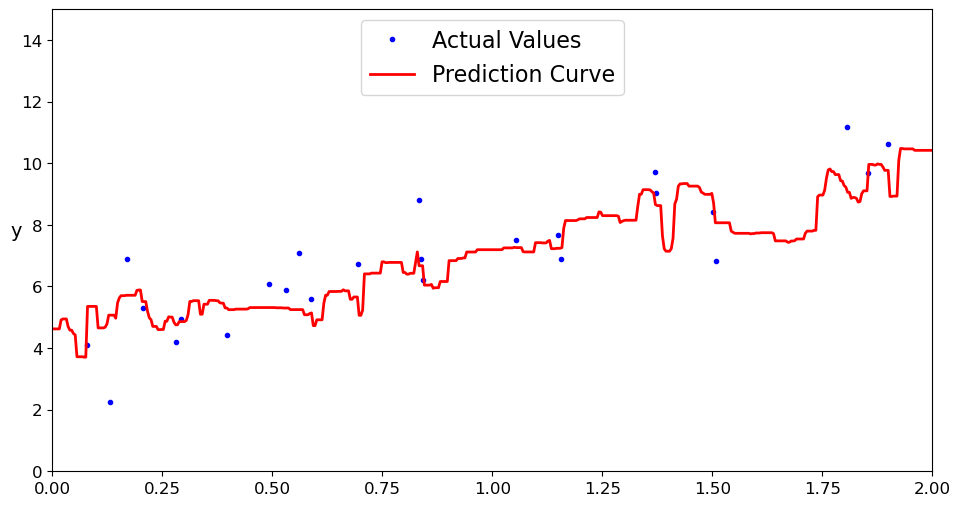

In [9]:
fig = plt.figure(figsize=(12,6))
rfr_model_plot = fig.add_subplot(1, 1, 1)

# Use the plot_predictions function to plot the predictions of the model
plot_predictions(rfr_model, X_test, y_test, axes=[0, 2, 0, 15], label="Prediction Curve", style="r-", 
                 data_style="b.", data_label="Actual Values")

rfr_model_plot.set_aspect(.07) 
rfr_model_plot.set_ylabel('y', rotation=0)

fig.savefig('rfr_model_prediction_curve.png')

# Explore 2D Linear Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  Update the below bullets accordingly.  When you are done playing, set these to the best values you can for submission.  Update the below bullets accordingly.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

Values "played around with":
 - `splitter = <values>`
 - `max_depth = <values>`
 - `min_samples_split = <values>`
 - `random_state = 42`

Initial "best values":
 - `splitter = <value>`
 - `max_depth = <value>`
 - `min_samples_split = <value>`
 - `random_state = 42`

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Play around values
splitter = ["best", "random"]
min_samples_splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
max_depths = [ 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

# List for results
results = []

# Function to iterate through 'play around' values
for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        for split in splitter:
            play_dtr_model = DecisionTreeRegressor(splitter=split,
                                                  min_samples_split=min_samples_split,
                                                  max_depth=max_depth,
                                                  random_state=42)
            
            play_dtr_model.fit(X_train, y_train)

            # Use trained model on test set to get predictions
            play_dtr_mod_preds = play_dtr_model.predict(X_test)

            # Calculate the mean squared error and accuracy of my predictions so I can find the best model by sorting.
            mse = mean_squared_error(y_test, play_dtr_mod_preds)
            
            # Store the results in the results list so I can print them
            results.append({'splitter': split,
                            'min_samples_split': min_samples_split,
                            'max_depth': max_depth,
                            'mse': mse})
            
            # Print the current parameters, score, and MSE so I can examine how different values change model
            # print(f"Current Parameters: Splitter={split}, Min Samples Split={min_samples_split}, Max depth={max_depth}")
            # print(f"Current MSE: {mse}")
            # print()

# Sort the results by MSE (should sort best model to first element by default because lowest MSE is best model)
sorted_results = sorted(results, key=lambda x: x['mse'])

# The best "play" parameters are the first element of sorted_results
best_play_parameters = sorted_results[0]
print(f"Best 'play' parameters: Splitter={best_play_parameters['splitter']}, Min Samples Split={best_play_parameters['min_samples_split']}, \
Max depth={best_play_parameters['max_depth']}")
print(f"Best MSE: {best_play_parameters['mse']}")


# Values "played around with":

# splitter = <"best", "random">
# max_depth = <1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14>
# min_samples_split = <20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1>
# random_state = 42

# Initial "best values":

# splitter = <"random">
# max_depth = <6>
# min_samples_split = <7>
# random_state = 42

Best 'play' parameters: Splitter=random, Min Samples Split=7, Max depth=6
Best score: 0.7410647061373709
Best MSE: 1.1677445005351437


In [11]:
# Now that I have best parameters, train model.
dtr_model = DecisionTreeRegressor(splitter = "random", min_samples_split=7, max_depth=6, random_state=42)

dtr_model.fit(X_train, y_train)

# Use trained model on test set to get predictions
dt_mod_preds = dtr_model.predict(X_test)

### Plot Model Predictions for Training Set

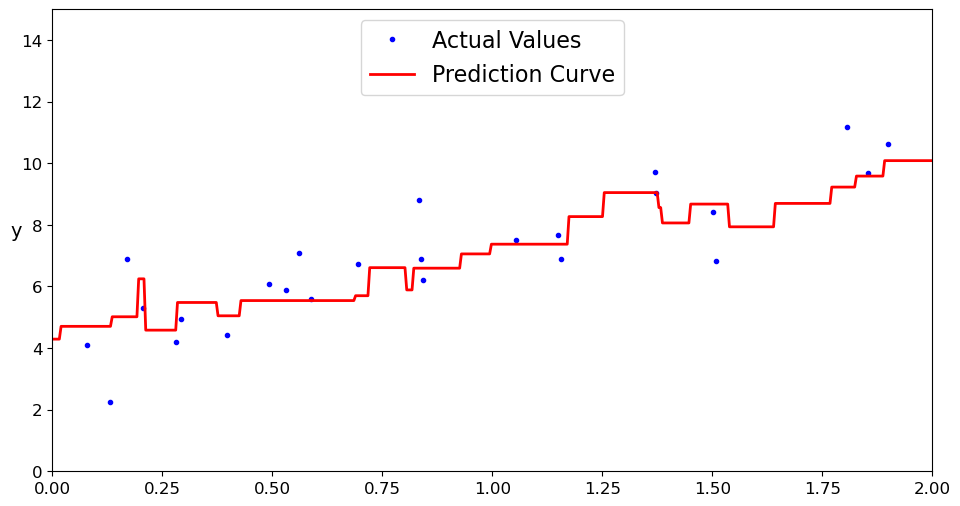

In [12]:
fig = plt.figure(figsize=(12,6))
dtr_model_plot = fig.add_subplot(1, 1, 1)

# Use the plot_predictions function to plot the predictions of the model
plot_predictions(dtr_model, X_test, y_test, axes=[0, 2, 0, 15], label="Prediction Curve", style="r-", 
                 data_style="b.", data_label="Actual Values")

dtr_model_plot.set_aspect(.07) 
dtr_model_plot.set_ylabel('y', rotation=0)

fig.savefig('dtr_model_prediction_curve.png')

# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me at least three rounds of grid searches per model to ascertain the optimal hyperparameter values below).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters. Use the following hyperparameter values as the bounds of the ranges to be probed in your initial (course-grained) stint of grid searching. Note that these are NOT upper bounds for the further refined grid searches. If your initial search returns the upper bound of your values, you can (and should) search further above and below that value. You should examine these hyperparameters and their associated ranges, learn from this example, and use these values as a basis for your own future work when performing grid searches.  This is how you will build your machine learning intuition.  Keep in mind, these values also depend somewhat on this specific dataset!  (For example, it is important to notice that I decided to probe up to 1,000 for n_estimators.  10 would have been far too small.  1,000,000 would have been far too large.) 

   GradientBoostingRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `learning_rate = from .01 to 1`

   RandomForestRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `min_samples_split = up to 20`

   DecisionTreeRegressor:
    
     - `splitter = ["best", "random"]`
     - `max_depth = up to 32`
     - `min_samples_split = up to 20`  
     
     
4. `learning rate` should be rounded to two decimals.
5. The number of cross-folds. Specify `cv=3`


## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [13]:
# Coarse-Grained GradientBoostingRegressor GridSearch

# I used the following website: https://www.kaggle.com/code/paulh2718/gradientboostingregressor-gridsearchcv/notebook, our
# textbook, page 79-81, and the video walkthrough for this code. I kept param_grid with the same name because I found lots
# of examples of grid searches and a lot use the same variable name, so it seemed like it is normal to name the dictionary
# param_grid when performing a grid search.

from sklearn.model_selection import GridSearchCV

param_grid= {'learning_rate': [.1, .25, .5, .75, 1],
             'max_depth': [5, 10, 15, 20, 25, 30],
             'n_estimators': [250, 500, 750, 1000]}

gb_model_obj = GradientBoostingRegressor(random_state=42)

gb_gridsearch = GridSearchCV(gb_model_obj, param_grid, verbose=1, cv=3,)

gb_gridsearch.fit(X_train, y_train)

print('The best parameters so far are: ',gb_gridsearch.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
The best parameters so far are:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}


In [14]:
# Second GradientBoostingRegressor GridSearch
param_grid= {'learning_rate': [.24, .2, .16, .12, .08],
             'max_depth': [9, 8, 7, 6, 5, 4, 3, 2, 1],
             'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450]}

gb_model_obj = GradientBoostingRegressor(random_state=42)

gb_gridsearch = GridSearchCV(gb_model_obj, param_grid, verbose=1, cv=3,)

gb_gridsearch.fit(X_train, y_train)

print('The best parameters so far are: ',gb_gridsearch.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
The best parameters so far are:  {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 450}


In [15]:
# Third GradientBoostingRegressor GridSearch
param_grid= {'learning_rate': [.23, .22, .21, .20, .19, .18, .17],
             'max_depth': [1],
             'n_estimators': [450, 460, 470, 480, 490]}

gb_model_obj = GradientBoostingRegressor(random_state=42)

gb_gridsearch = GridSearchCV(gb_model_obj, param_grid, verbose=1, cv=3,)

gb_gridsearch.fit(X_train, y_train)

print('The best parameters so far are: ',gb_gridsearch.best_params_)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
The best parameters so far are:  {'learning_rate': 0.19, 'max_depth': 1, 'n_estimators': 480}


In [16]:
# Fourth GradientBoostingRegressor GridSearch
param_grid= {'learning_rate': [.19],
             'max_depth': [1],
             'n_estimators': [470, 475, 480, 485, 490]}

gb_model_obj = GradientBoostingRegressor(random_state=42)

gb_gridsearch = GridSearchCV(gb_model_obj, param_grid, verbose=1, cv=3,)

gb_gridsearch.fit(X_train, y_train)

print('The best parameters so far are: ',gb_gridsearch.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best parameters so far are:  {'learning_rate': 0.19, 'max_depth': 1, 'n_estimators': 480}


In [17]:
# Final GradientBoostingRegressor GridSearch
param_grid= {'learning_rate': [.19],
             'max_depth': [1],
             'n_estimators': [476, 477, 478, 479, 480, 481, 482, 483, 484]}

gb_model_obj = GradientBoostingRegressor(random_state=42)

gb_gridsearch = GridSearchCV(gb_model_obj, param_grid, verbose=1, cv=3,)

gb_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',gb_gridsearch.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
The best parameters are:  {'learning_rate': 0.19, 'max_depth': 1, 'n_estimators': 484}


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = <.19>`
- `max_depth = <1>`
- `n_estimators = <484>`

In [18]:
# Coarse-Grained RandomForestRegressor GridSearch
param_grid= {'min_samples_split': [5, 10, 15, 20],
             'max_depth': [8, 16, 24, 32],
             'n_estimators': [250, 500, 750, 1000]}

rf_model_obj = RandomForestRegressor(random_state=42)

rf_gridsearch = GridSearchCV(rf_model_obj, param_grid, verbose=1, cv=3,)

rf_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',rf_gridsearch.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
The best parameters are:  {'max_depth': 16, 'min_samples_split': 10, 'n_estimators': 1000}


In [19]:
# Second RandomForestRegressor GridSearch
param_grid= {'min_samples_split': [7, 8, 9, 10, 11, 12, 13],
             'max_depth': [10, 12, 14, 16, 18, 20, 22],
             'n_estimators': [800, 900, 1000, 1100, 1200]}

rf_model_obj = RandomForestRegressor(random_state=42)

rf_gridsearch = GridSearchCV(rf_model_obj, param_grid, verbose=1, cv=3,)

rf_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',rf_gridsearch.best_params_)

Fitting 3 folds for each of 245 candidates, totalling 735 fits
The best parameters are:  {'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 900}


In [20]:
# Third RandomForestRegressor GridSearch
param_grid= {'min_samples_split': [7, 8, 9, 10, 11, 12, 13],
             'max_depth': [9, 10, 11],
             'n_estimators': [800, 850, 900, 950, 1000]}

rf_model_obj = RandomForestRegressor(random_state=42)

rf_gridsearch = GridSearchCV(rf_model_obj, param_grid, verbose=1, cv=3,)

rf_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',rf_gridsearch.best_params_)

Fitting 3 folds for each of 105 candidates, totalling 315 fits
The best parameters are:  {'max_depth': 9, 'min_samples_split': 8, 'n_estimators': 900}


In [21]:
# Fourth RandomForestRegressor GridSearch
param_grid= {'min_samples_split': [8],
             'max_depth': [8, 9, 10],
             'n_estimators': [825, 875, 900, 925, 975]}

rf_model_obj = RandomForestRegressor(random_state=42)

rf_gridsearch = GridSearchCV(rf_model_obj, param_grid, verbose=1, cv=3,)

rf_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',rf_gridsearch.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
The best parameters are:  {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 900}


In [22]:
# Fifth RandomForestRegressor GridSearch
param_grid= {'min_samples_split': [8],
             'max_depth': [3, 4, 5, 6, 7, 8],
             'n_estimators': [880, 890, 900, 910, 920]}

rf_model_obj = RandomForestRegressor(random_state=42)

rf_gridsearch = GridSearchCV(rf_model_obj, param_grid, verbose=1, cv=3,)

rf_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',rf_gridsearch.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
The best parameters are:  {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 900}


In [23]:
# Sixth RandomForestRegressor GridSearch
param_grid= {'min_samples_split': [8],
             'max_depth': [5],
             'n_estimators': [891, 897, 900, 903, 909]}

rf_model_obj = RandomForestRegressor(random_state=42)

rf_gridsearch = GridSearchCV(rf_model_obj, param_grid, verbose=1, cv=3,)

rf_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',rf_gridsearch.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best parameters are:  {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 900}


In [24]:
# Seventh RandomForestRegressor GridSearch
param_grid= {'min_samples_split': [8],
             'max_depth': [5],
             'n_estimators': [898, 899, 900, 901, 902]}

rf_model_obj = RandomForestRegressor(random_state=42)

rf_gridsearch = GridSearchCV(rf_model_obj, param_grid, verbose=1, cv=3,)

rf_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',rf_gridsearch.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
The best parameters are:  {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 901}


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = <5>`
- `n_estimators = <901>`
- `min_samples_split = <8>`

In [25]:
# Coarse-Grained DecisionTreeRegressor GridSearch
param_grid= {'splitter': ["best", "random"],
             'min_samples_split': [8, 16, 24, 32],
             'max_depth': [5, 10, 15, 20]}

dt_model_obj = DecisionTreeRegressor(random_state=42)

dt_gridsearch = GridSearchCV(dt_model_obj, param_grid, verbose=1, cv=3,)

dt_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',dt_gridsearch.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
The best parameters are:  {'max_depth': 5, 'min_samples_split': 16, 'splitter': 'best'}


In [26]:
# Second DecisionTreeRegressor GridSearch
param_grid= {'splitter': ["best"],
             'min_samples_split': [10, 12, 14, 16, 18, 20, 22],
             'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}

dt_model_obj = DecisionTreeRegressor(random_state=42)

dt_gridsearch = GridSearchCV(dt_model_obj, param_grid, verbose=1, cv=3,)

dt_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',dt_gridsearch.best_params_)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 10, 'splitter': 'best'}


In [27]:
# Third DecisionTreeRegressor GridSearch
param_grid= {'splitter': ["best"],
             'min_samples_split': [9, 10, 11],
             'max_depth': [6]}

dt_model_obj = DecisionTreeRegressor(random_state=42)

dt_gridsearch = GridSearchCV(dt_model_obj, param_grid, verbose=1, cv=3,)

dt_gridsearch.fit(X_train, y_train)

print('The best parameters are: ',dt_gridsearch.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 10, 'splitter': 'best'}


On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = <'best'>`
- `max_depth = <6>`
- `min_samples_split = <10>`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.  

### Create Optimal GradientBoostingRegressor Model

In [28]:
# learning_rate = <.19>
# max_depth = <1>
# n_estimators = <484>

# Train model with best parameters
gb_model = GradientBoostingRegressor(learning_rate=.19,
                                     max_depth=1,
                                     n_estimators=484,
                                     random_state=42)

# Fit model
gb_model.fit(X_train, y_train)

# Use trained model on test set to get predictions
gb_mod_preds = gb_model.predict(X_test)

### Plot Model Predictions for Training Set

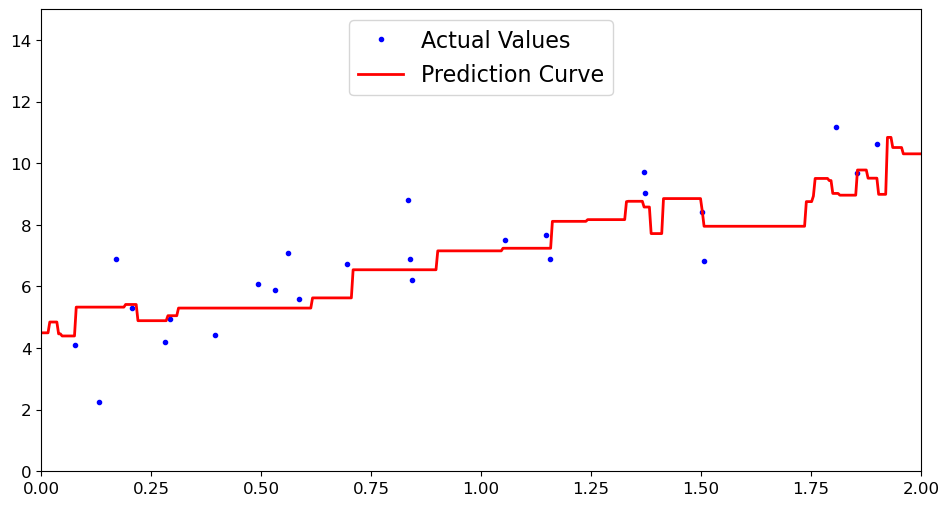

In [29]:
fig = plt.figure(figsize=(12,6))
gb_model_plot = fig.add_subplot(1, 1, 1)

# Use the plot_predictions function to plot the predictions of the model
plot_predictions(gb_model, X_test, y_test, axes=[0, 2, 0, 15], 
                 label="Prediction Curve", style="r-", 
                 data_style="b.", data_label="Actual Values")

# For consistency, I kept the plots like the first one.
gb_model_plot.set_aspect(.07)
gbr_model_plot.set_ylabel('y', rotation=0)

fig.savefig('gb_model_prediction_curve.png')

### Create Optimal RandomForestRegressor Model

In [1]:
# max_depth = <5>
# n_estimators = <901>
# min_samples_split = <8>

# Train model with best parameters
rf_model = RandomForestRegressor(min_samples_split=8,
                                 max_depth=5,
                                 n_estimators=901,
                                 random_state=42)
# Fit model
rf_model.fit(X_train, y_train)

# Use trained model on test set to get predictions
rf_mod_preds = rf_model.predict(X_test)

NameError: name 'RandomForestRegressor' is not defined

### Plot Model Predictions for Training Set

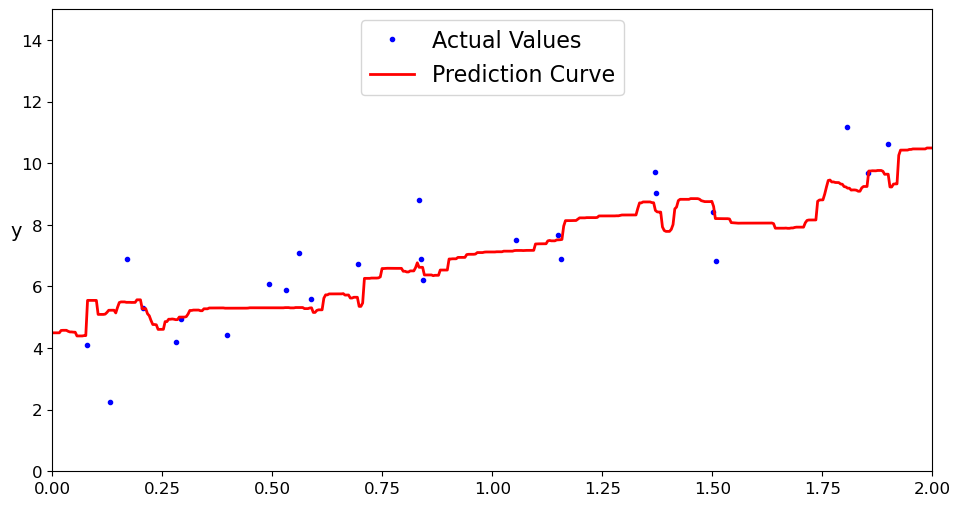

In [31]:
fig = plt.figure(figsize=(12,6))
rf_model_plot = fig.add_subplot(1, 1, 1)

# Use the plot_predictions function to plot the predictions of the model
plot_predictions(rf_model, X_test, y_test, axes=[0, 2, 0, 15], 
                 label="Prediction Curve", style="r-", 
                 data_style="b.", data_label="Actual Values")

rf_model_plot.set_aspect(.07)
rf_model_plot.set_ylabel('y', rotation=0)

fig.savefig('rf_model_prediction_curve.png')

### Create Optimal DecisionTreeRegressor Model

In [32]:
# splitter = <'best'>
# max_depth = <6>
# min_samples_split = <10>

# Train model with best parameters
dt_model = DecisionTreeRegressor(splitter='best',
                                 min_samples_split=10,
                                 max_depth=6,
                                 random_state=42)

# Fit model
dt_model.fit(X_train, y_train)

# Use trained model on test set to get predictions
dt_mod_preds = dt_model.predict(X_test)

### Plot Model Predictions for Training Set

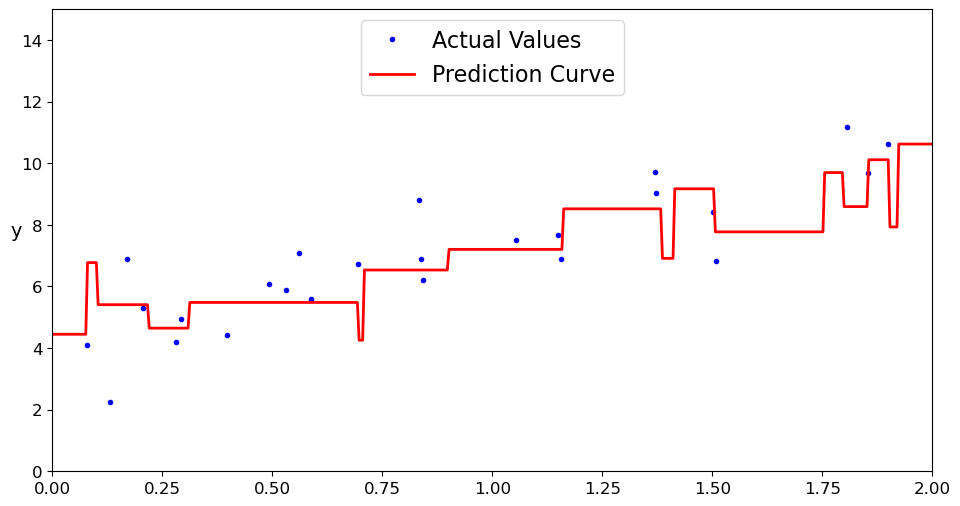

In [33]:
fig = plt.figure(figsize=(12,6))
dt_model_plot = fig.add_subplot(1, 1, 1)

# Use the plot_predictions function to plot the predictions of the model
plot_predictions(dt_model, X_test, y_test, axes=[0, 2, 0, 15],
                 label="Prediction Curve", style="r-",
                 data_style="b.", data_label="Actual Values")

dt_model_plot.set_aspect(.07)
dt_model_plot.set_ylabel('y', rotation=0)

fig.savefig('dt_model_prediction_curve.png')

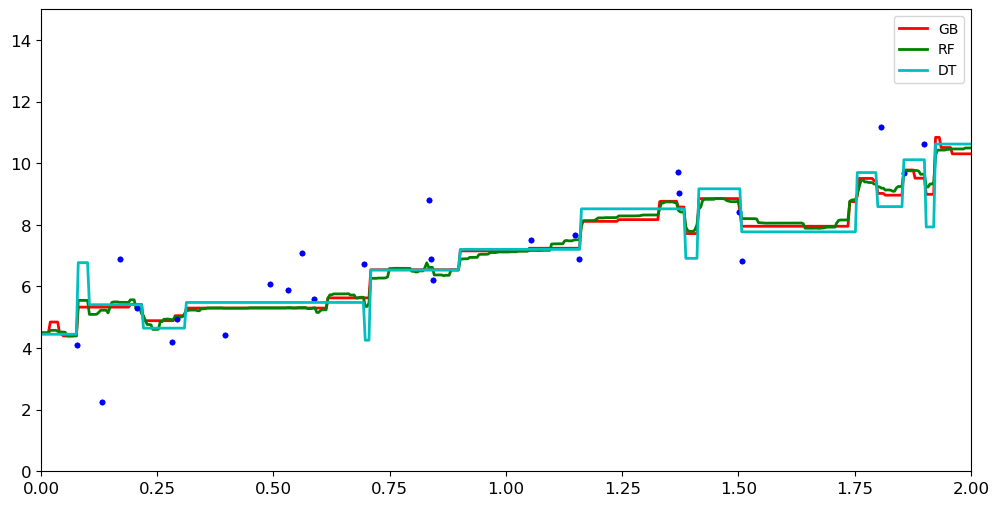

In [34]:
fig, ax = plt.subplots(figsize=(12,6)) 

# Plot Gradient Boosting predictions
plot_predictions(gb_model, X_test, y_test, axes=[0, 2, 0, 15],  
                 label='GB', style="r-")

# Plot Random Forest predictions 
plot_predictions(rf_model, X_test, y_test, axes=[0, 2, 0, 15],
                 label='RF', style="g-")

# Plot Decision Tree predictions
plot_predictions(dt_model, X_test, y_test, axes=[0, 2, 0, 15],  
                 label='DT', style="c-")  

# Add legend
ax.legend()

fig.savefig('all_models.png')

# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four decimal places.  Print the generalization error for all three models.

In [38]:
# I started with just the MSE, but then I slowly built this section up to include a sufficient scope of error statistics to
# make a well-justified choice. It is probably overkill, but I figure the effort will only benefit me in the future. I rounded 
# each value in the print function so the original value remains untouched.

# Get errors
gb_errors = y_test - gb_mod_preds
rf_errors = y_test - rf_mod_preds  
dt_errors = y_test - dt_mod_preds

# Calculate all the error statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate the mean squared error.
gb_mse = mean_squared_error(y_test, gb_mod_preds)
rf_mse = mean_squared_error(y_test, rf_mod_preds)
dt_mse = mean_squared_error(y_test, dt_mod_preds)

# Calculate the mean absolute error.
gb_mae = mean_absolute_error(y_test, gb_mod_preds)
rf_mae = mean_absolute_error(y_test, rf_mod_preds)
dt_mae = mean_absolute_error(y_test, dt_mod_preds)

# Calculate the (arithmatic) mean, median, and standard deviation.
gb_mean = np.mean(gb_errors)
rf_mean = np.mean(rf_errors)
dt_mean = np.mean(dt_errors)

gb_median = np.median(np.absolute(gb_errors))
rf_median = np.median(np.absolute(rf_errors))
dt_median = np.median(np.absolute(dt_errors))

gb_std = np.std(gb_errors)
rf_std = np.std(rf_errors)
dt_std = np.std(dt_errors)

# IQR values
gb_iqr = np.percentile(gb_errors, 75) - np.percentile(gb_errors, 25)
rf_iqr = np.percentile(rf_errors, 75) - np.percentile(rf_errors, 25)
dt_iqr = np.percentile(dt_errors, 75) - np.percentile(dt_errors, 25)

# Print error statistics for each model.
print('Gradient Boosting error stats:')
print(f'MSE: {gb_mse:.4f}')
print(f'MAE: {gb_mae:.4f}')
print(f'Mean: {gb_mean:.4f}')
print(f'Median: {gb_median:.4f}')
print(f'Std Dev: {gb_std:.4f}')
print(f'IQR: {gb_iqr:.4f}')
print()

print('Random Forest error stats:')
print(f'MSE: {rf_mse:.4f}')
print(f'MAE: {rf_mae:.4f}')
print(f'Mean: {rf_mean:.4f}')
print(f'Median: {rf_median:.4f}')
print(f'Std Dev: {rf_std:.4f}')
print(f'IQR: {rf_iqr:.4f}')
print()

print('Decision Tree error stats:')
print(f'MSE: {dt_mse:.4f}')
print(f'MAE: {dt_mae:.4f}')
print(f'Mean: {dt_mean:.4f}')
print(f'Median: {dt_median:.4f}')
print(f'Std Dev: {dt_std:.4f}')
print(f'IQR: {dt_iqr:.4f}')

Gradient Boosting error stats:
MSE: 1.3327
MAE: 0.8570
Mean: 0.2859
Median: 0.5855
Std Dev: 1.1185
IQR: 1.3874

Random Forest error stats:
MSE: 1.3099
MAE: 0.8712
Mean: 0.2448
Median: 0.6419
Std Dev: 1.1180
IQR: 1.3792

Decision Tree error stats:
MSE: 1.5705
MAE: 0.9246
Mean: 0.2899
Median: 0.5056
Std Dev: 1.2192
IQR: 0.9411


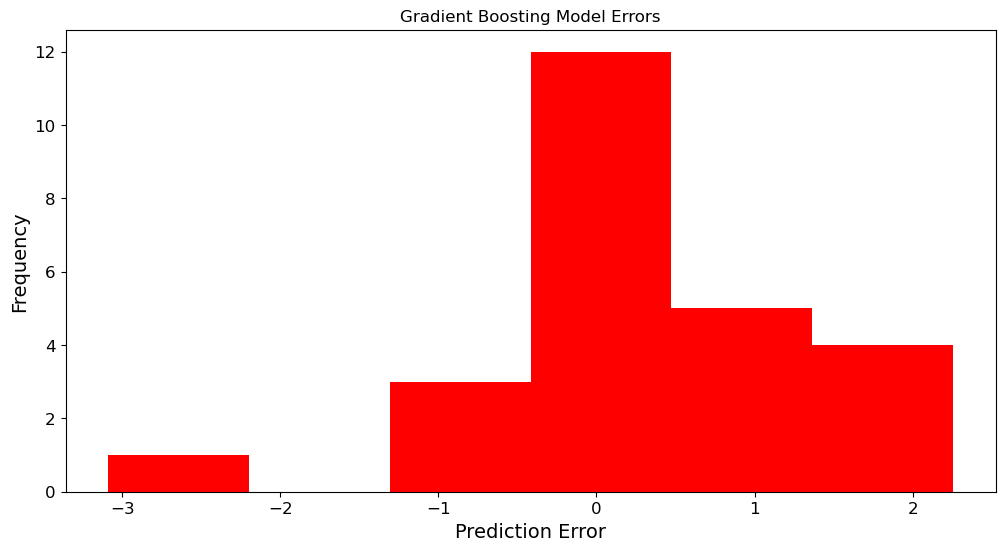

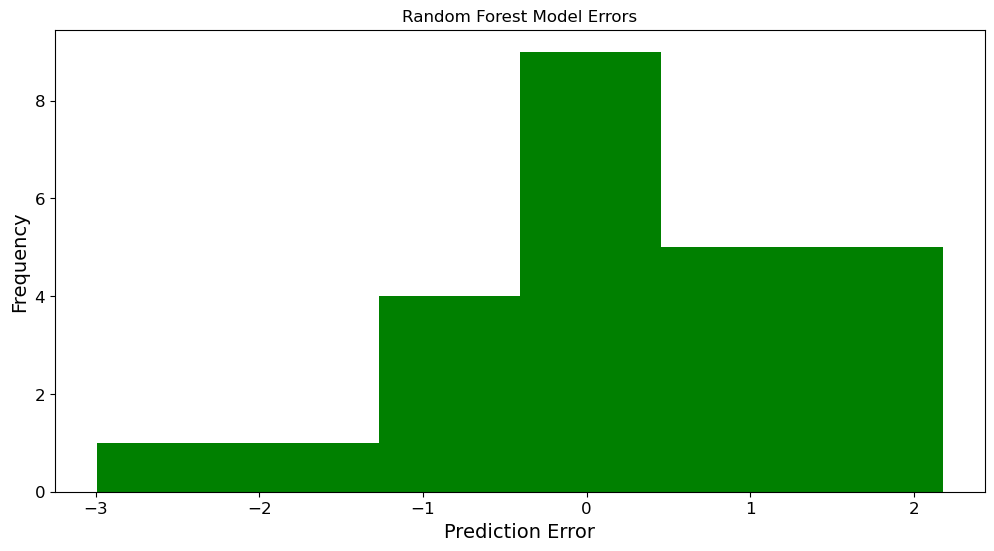

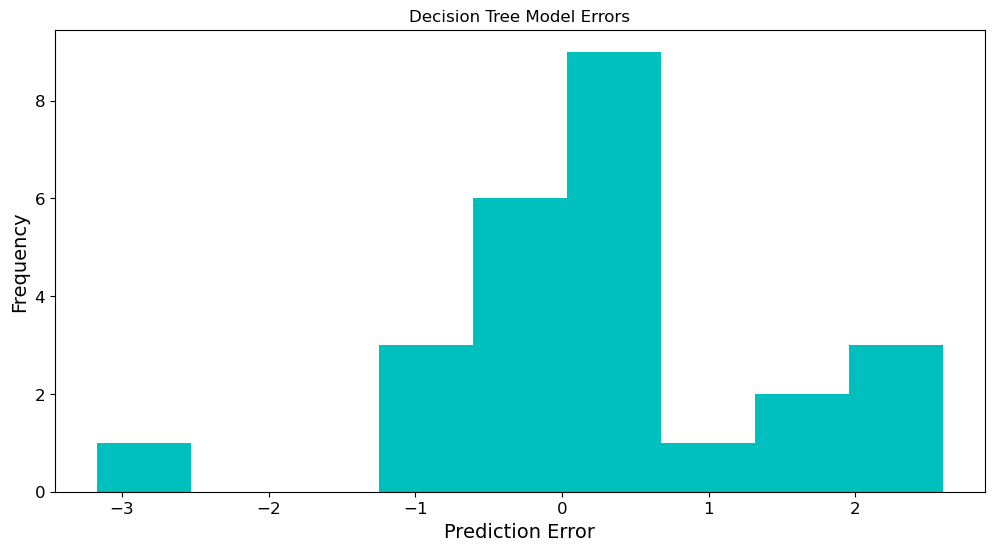

In [36]:
# Plot Histograms for critical analysis

# Plot histogram for Gradient Boosting errors
fig = plt.figure(figsize=(12,6))
gb_error_plot = fig.add_subplot(1, 1, 1)
gb_error_plot.hist(gb_errors, bins='auto', color='r')
gb_error_plot.set_xlabel('Prediction Error')
gb_error_plot.set_ylabel('Frequency')
gb_error_plot.set_title('Gradient Boosting Model Errors')
fig.savefig('gb_model_error_histogram.png')

# Plot histogram for Random Forest errors
fig = plt.figure(figsize=(12,6))
rf_error_plot = fig.add_subplot(1, 1, 1)
rf_error_plot.hist(rf_errors, bins='auto', color='g')
rf_error_plot.set_xlabel('Prediction Error')
rf_error_plot.set_ylabel('Frequency')
rf_error_plot.set_title('Random Forest Model Errors')
fig.savefig('rf_model_error_histogram.png')

# Plot histogram for Decision Tree errors
fig = plt.figure(figsize=(12,6))
dt_error_plot = fig.add_subplot(1, 1, 1)
dt_error_plot.hist(dt_errors, bins='auto', color='c')
dt_error_plot.set_xlabel('Prediction Error')
dt_error_plot.set_ylabel('Frequency')
dt_error_plot.set_title('Decision Tree Model Errors')
fig.savefig('dt_model_error_histogram.png')

# Critical Analysis

Think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results. Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results? Can you see any relationship between the prediction curves and the generalization error?

I am looking for **meaningful content** here.  Do not copy-and-paste model definitions off of the Internet.  You should think and write critically.


1. Think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results.

Since the random forest model has the best historgram and the lowest mean, MSE, and standard deviation, it makes the most accurate predictions on average. The gradient boosting results are in between the random forest and decision tree models. It has the lowest MAE. The decision tree has the lowest median and IQR, but more deficiences than the gradient boosting and random forest models. 

Further, looking at the error statistics, prediction histograms, and optimal hyperparameters, the random forest model performs the best overall. It has the lowest generalization error statistics and a more well-populated prediction histogram. In contrast, the decision tree overfits with high depth and error, and gradient boosting underfits with shallow depth. However, the gradient boosting histogram does have a bit more of a bell appearance, but with a slightly higher variance.

2. Can you explain in your own words how the algorithms work?

Decision trees split the data into branches based on features to isolate and predict classes. For decision tree regression tasks, the "features" are values. The value chosen is whatever feature "best" splits the data into two branches that minimizes the impurity or entropy of each node. So, if we have 5 y values (lets say 2, 4, 9 and 31 and 36) the decision tree might split them into two nodes with 2, 4, and 9 in one node and 31 and 36 in another node. Then, for x values corresponding with the y values in either node, the mean of the y values would be returned as the prediction. 

Random forests improve on this by training many trees on subsets of both data and features, then averaging the predictions to reduce variance. To explain, the random forest model will grow several decision trees on random subsets of the data, and when growing each tree, the set of X values are split differently. Each tree (which is a subset of the data and features) will use a subset of the set of all x values, and this will be random, but the split will always minimize the mean of each node. The randomness isn't uncontrolled, though. Rather, it is purposefully baked into the model workings. Therefore, each tree is different from  every other tree. Then the random forest model passes new X values down each of its decision trees and each tree makes a prediction for each x value based on which leaf node the value corresponds to. Then, it averages all the tree predictions to make a final prediction for that value.

Gradient boosting improves weak decision tree models by correcting the previous tree's errors. Unlike the random forest model, it works sequentially, adding a new tree each iteration rather than training all trees concurrently. Gradient boosting starts with a simple base model and makes initial predictions that have high error. Then, a new decision tree is trained to predict the residuals or errors of the base model. This second tree tries to correct the mistakes of the first one by predicting the residual error. Together, the trees should perform better than just the first tree. This process continues, adding new trees that sequentially reduce the residual errors left over by the previous ones. Basically, this looks like this for INDIVIDUAL predictions:

So, using like a sorta' psuedo code representation:

y_pred_1 = base_model_prediction 

y_pred_2 = y - y_pred_1 

y_pred_3 = y - (y_pred_1 + y_pred_2)

y_pred_4 = y - (y_pred_1 + y_pred_2 + y_pred_3)

final_prediction = y_pred_1 + y_pred_2 + y_pred_3 + ...

This is without a learning rate, and a learning rate of 1 will always converge within 2 iterations, so a low learning rate is critical for generalization and preventing overfitting/underfitting. A more mathematical-style representation of gradient boosting, but with a learning rate, looks like this:

y = target variable
y1 = initial prediction
a = learning rate

Calculate residual error:
r = y - y1

Update prediction:
y1 = y1 + a * r

Repeat:
Go back to step 1 and calculate new residual error using updated y value:
r = y - y1

And now a few iterations:

Iteration 1:
r1 = y - y1
y2 = y1 + a*r1

Iteration 2:
r2 = y - y2
y3 = y2 + a*r2

Iteration 3:
r3 = y - y3
y4 = y3 + a*r3

And so on...

Anyway, I probably didn't need to go so far in depth, but it helped me understand it better to work through it anyway. There is a mathematical formalization for the above (I looked it up), but I will just stop here.

3. How do the results predicted by these models compare and contrast?

In comparison:

The standard deviations of all three are very close, between 1.11 and 1.22 for all models. Therefore, the errors of all the models have a similar spread. This is further supported by the range of median errors, which is between .5 and .64 for all three models. The predictions follow similar trends on the graphs, increasing and decreasing in the same regions (see the plot with all three models on the same subplot).

In contrast:

The random forest model has the lowest MSE at 1.3099, compared to 1.3327 for the gradient boosting model, and 1.5705 for the decision tree model. So it has the minimum error variance. The random forest model also has the lowest mean error at 0.2448, compared to 0.2859 for the gradient boosting and 0.2899 for the decision tree. Also, only the random forest model has values populating all bins in its histogram.

However, the decision tree model has the lowest IQR at 0.9411, while the random Forest and gradient boosting models have higher IQRs around 1.38. This suggests the decision tree model makes the most consistent prediction errors. However, the higher MSE and MAE indicates that the low IQR is likely due to overfitting rather than better performance. Further, the decision tree predictions are more irregular, while the random forest model's are less prone to large jumps in value predictions (again, see the plot will all three models on the same plot).

Another contrast or difference is that the random forest and gradient boosting models are ensemble methods, while the decision tree is a single model.

4. Can you see any relationship between the algorithms and the model results?

There seems to be a pretty clear relationship between regularization and generalization. Bagging and boosting both introduce a regularized complexity that mitigates over and underfitting. The random forest and gradient boosting models reduced both errors and variance, compared to the decision tree model, which overfits and has higher variance. The random forest model and gradient boosting model both employ regularization techniques. This is what enables them to reduce variance. The random forest reduces variance through aggregate averaging and gradient boosting reduces variance by training sequential models with each new model fixing the errors of the previous model at some specified or optimal rate. I think another important relationship I am supposed to learn from this exercise is direct experience of the claim that bagging and boosting and other regularization techniques
improve model performance. So, in philosophy a stack of leaky buckets is fallacious, but in statistics it's not! (just joking). At face value, it seemed to me that this resembled the leaky buckets fallacy, but after considerable thought I realized it isn't subject to that fallacy for at least three reasons (that is, I can think of at least three reasons regularization works and isn't fallacious where leaky buckets fail:

    1) The models in the ensemble are intentionally different. That is, one model will differ from another model in the 
       ensemble in some significant way that influences model outcome). Thus, regularization is not just replicating the 
       same flawed model.
    2) The collection of models complement each other's weaknesses and strengths, so errors get filtered or canceled out.
    3) The ensemble exhibits new properties/qualities that the individual models lack, an "emergent" generalization ability.

So, to summarise semi-formally and concisely, regularization techniques leverage model diversity to improve the overall system in a way that avoids the leaky buckets fallacy. In other words, the failures get eliminated by diversity rather than duplication. Maybe this is not vital to acheiving a high score on this assignment, but working through it in detail has helped me better understand what is happening backstage. As for all this philosophy talk, I am simply leaning on my own strengths to understand the subject matter. I have an M.A. in Philosophy, so my mind lingers there.

5. Can you see any relationship between the prediction curves and the generalization error?

The models with lower generalization error (random forest and gradient boosting) have a lower mean, median, and standard deviation of errors. So there is a clear inverse relationship between generalization performance and error distribution statistics. What I mean is that as a model's ability to perform better predictions on unseen data improves, the errors decrease in both number and severity (I kind of mean how "big" or impactful the error is). Anyway, this is all really tautologous, since improving performance just is reducing error, but it helps understand how the prediction curves relate to the generalization error, and even helps improve "data science" intuitions, by giving me visual queues or "red flags", as it were, concerning model performance. So, to address the original question, models with lower generalization error, like the random forest model, will have smoother prediction curves that still closely fit the training data. Models that overfit, like the decision tree model, will have less smooth curves that fluctuate more rapidly to plot noise in the training data (this can be seen just by looking at the subplot above with all three models). So lower generalization error leads to smoother, better-fit prediction curves, while higher generalization error leads to more fluctuating, irregular prediction curves.

# Final Model Selection and Justification

Based on the arguments outlined in your critical analysis, make one final model recommendation.  Which model best characterizes this data?  In other words, which of these models is going to generalize better? Consider all factors.  What is the type of the optimal model (i.e. `GradientBoostingRegressor`, `RandomForestRegressor`, or `DecisionTreeRegressor`)? What are the optimal model hyperparameters that should be used for training on this data set?    Succinctly summarize the justification for your choice based on your arguments made above in the critical analysis section.


Based on my critical analysis above, I would select the Random Forest model.

My justification is as follows:

- The Random Forest model achieved the lowest generalization error overall based on the error statistics (mean, median, standard deviation, MSE, MAE). I am more confident that it will generalize better than the other models.

- The random forest model seems to also have the best balance of optimal hyperparameters. It is not as deep as the decision tree model or as shallow as the gradient boosting model.  

- The random forest model has a more smooth prediction curve than both the decision tree and gradient boosting models. It is only slighly better than the gradient boosting model, but is better nonetheless.

- The random forest model's histogram has values populating every bin and has a better distribution than the other models. The gradient boosting model has a bell shaped histogram, but it's distribution is less "normal" and the decision tree model's histogram is missing values in one bin and has a bulge on the right tail rather than a bell shape.

- The only apparently inconsistent statistics are the decision tree model's lower IQR and median absolute error and the gradient boosting's lower MAE. Given the other statistics, it is more likely that the decision tree overfits rather than generalizing better, which would explain the lower IQR and median absolute error. The gradient boosting model's superior MAE is most likely, I think, I function of how the algorithm works. Each and every model in the ensemble is built to reduce residual error, so it makes sense that it has the lowest MAE even if it doesn't perform as well overall.